In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np

# On Browniam motion and Diffusion coefficient

> In this notebook we perform a mini Brownian motion simulation in 3D and check that the mean squared displacement (the variance of the instantaneous position) follows the theoretical equation
> 
> For a general introduction on Brownian motion simulation see [Theory - Introduction to Brownian Motion simulation](Theory - Introduction to Brownian Motion simulation.ipynb)

$$\langle|\vec{r}(t)-\vec{r}(t+\tau)|^2\rangle = \sigma^2 = 2 D N \tau$$

- $\vec{r}(t)$ position at time $t$
- $N$ number of dimensions ($N$=3 for 3D simulations)
- $D$ diffusion coefficient
- $\tau$ time interval.

In [3]:
D = 1
t = 1
N = 3
sigma = np.sqrt(2*N*D*t)
sigma_1d = np.sqrt(2*D*t)
sigma

2.4494897427831779

In [4]:
n_trajectories = 100
n_time_steps = 1000

In [5]:
np.random.seed(1)

dx = sigma_1d*np.random.randn(n_time_steps, n_trajectories)
dy = sigma_1d*np.random.randn(n_time_steps, n_trajectories)
dz = sigma_1d*np.random.randn(n_time_steps, n_trajectories)

In [6]:
x, y, z = np.cumsum(dx, 0), np.cumsum(dy, 0), np.cumsum(dz, 0)

r_squared = x**2 + y**2 + z**2      # squared distance form the origin
dr_squared = dx**2 + dy**2 + dz**2  # squared delta-distance 

As a consistency check we fit the diffusion coefficient from the simulated data:

In [7]:
D_fitted = dr_squared.mean()/(2*N*t)  # Fitted diffusion coefficient
print('Fitted diffusion coefficient: %.5f , True value %.5f' % (D_fitted, D))

Fitted diffusion coefficient: 0.99889 , True value 1.00000


> **NOTE:** To fit $D$ we are averaging the squared distance covered at each time step in each trajectory.

Finally we plot as a function of time:

1. the squared distance $|\vec{r}(t)|^2$ for all the simulated trajectories (*light blue lines*),
2. the mean squared displacement  $\langle |\vec{r}(t)|^2 \rangle$(the variance of the distance), (*red line*)
3. the theoretical mean-squared-displacement (*dashed black line*)

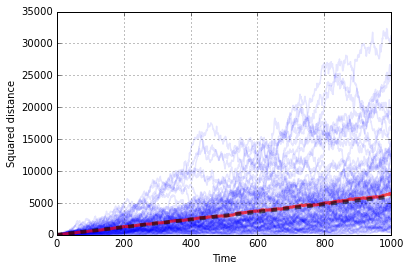

In [8]:
time = np.arange(r_squared.shape[0])*t

plot(time, r_squared, lw=1.5, alpha=0.1, color='b')
plot(time, r_squared.mean(1), 'r', lw=3, alpha=0.7)
plot(time, (2*N*D)*time, 'k', lw=4, ls='--', alpha=0.6);
xlabel('Time')
ylabel('Squared distance')
grid(True);

We note that the simulated $\langle |\vec{r}(t)|^2 \rangle$ follows the theoretical trend $2\,D\,N\,t$.